# Table of Contents

1 - Importing Libraries :


2 - Data Processing :


3 - EDA (EXPLORATORY DATA ANALYSIS):


4 - Splitting the data into Train-Test :


5 - Scaling the data (min-max Scaler) :


6 - Buliding RNN model.


7 - Compiling the MODEL :


8 - Defining actual price of our data.


9 - Plotting the "Results".

# 1 - Importing Libraries : 

These libraries are essential for handling data, performing exploratory data analysis (EDA), and visualizing the results.


In [1]:
import numpy as np #For algebrical operations.
import pandas as pd # For EDA purposes.
import seaborn as sns # For Datavisuals
import matplotlib.pyplot as plt #For Data visuals

# 2 - Data Processing : 

The dataset containing Tesla's stock prices is loaded using pandas.

In [2]:
data = pd.read_csv("/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/tsla.us.txt")

# 3 - EDA (EXPLORATORY DATA ANALYSIS): 

EDA helps understand the dataset's structure, dimensions, and summary statistics. It also checks for any missing values in the dataset.

In [3]:
data.head() #Printing the head or first few rows of our data.

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-06-28,17.00,17.00,17.00,17.00,0,0
1,2010-06-29,19.00,25.00,17.54,23.89,18783276,0
2,2010-06-30,25.79,30.42,23.30,23.83,17194394,0
3,2010-07-01,25.00,25.92,20.27,21.96,8229863,0
4,2010-07-02,23.00,23.10,18.71,19.20,5141807,0


In [4]:
data.shape # Shape in (ROWS*COLUMNS) format.

(1858, 7)

In [5]:
data.describe() #Statistical description of our data.

,Open,High,Low,Close,Volume,OpenInt
count,1858.000000,1858.000000,1858.000000,1858.000000,1.858000e+03,1858.0
mean,150.389741,152.898737,147.688064,150.355047,4.416508e+06,0.0
std,107.071675,108.490099,105.481665,107.023737,4.244294e+06,0.0
min,16.140000,16.630000,8.030000,15.800000,0.000000e+00,0.0
25%,31.002500,31.732500,30.285000,31.112500,1.283324e+06,0.0
50%,184.440000,188.660000,181.450000,184.850000,3.421026e+06,0.0
75%,231.477500,235.375000,227.772500,230.920000,5.917672e+06,0.0
max,386.690000,389.610000,379.345000,385.000000,3.714989e+07,0.0


In [6]:
 data.isna().sum() #Sum of all null-values in our dataset.

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

# 4 - Splitting the data into Train-Test : 

The data is split into training and testing sets, with 80% of the data used for training the model and 20% for testing.

In [7]:
# Defining training size to be 80% of the overall data.
training_size = int(len(data)*0.80)

#Defining the Length of data.
data_len = len(data)

# Defining Training and Testing Data.
train=data[0:training_size]
test=data[training_size:data_len]

In [8]:
print("Training Size --> ", training_size)
print("total length of data --> ", data_len)
print("Train length --> ", len(train))
print("Test length --> ", len(test))

Training Size -->  1486
total length of data -->  1858
Train length -->  1486
Test length -->  372


# 5 - Scaling the data (min-max Scaler) : 

Scaling ensures that the data is within a specific range, which helps improve the performance of the neural network. The Min-Max Scaler scales the data to a range of 0 to 1.

### NOTE : 
**SCALING** is to be used in cases where the shape of distribution is not at all affected , In cases of **NORMALIZING** we do change the shape of our distribution.

In [9]:
# the part of data that we will use as training.
train = train.loc[:, ["Open"]].values

# Defining range for Scaling.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)

In [10]:
end_len = len(train_scaled)
X_train = []
y_train = []
timesteps = 40

# Splitting the data into "X" and "Y" terms.
for i in range(timesteps, end_len):
    X_train.append(train_scaled[i - timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [11]:
# Reshaping the data as per as our need.
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print("X_train --> ", X_train.shape)
print("y_train shape --> ", y_train.shape)

X_train -->  (1446, 40, 1)
y_train shape -->  (1446,)


# Buliding RNN model. 

The model is built using Keras' Sequential API. It consists of four SimpleRNN layers, each followed by a Dropout layer to prevent overfitting. The final layer is a Dense layer that outputs a single value.


In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

2024-05-31 15:05:11.546014: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-31 15:05:11.546157: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-31 15:05:11.704149: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [13]:
# Initialize a sequential model
regressor = Sequential()  

# Add the first SimpleRNN layer and add dropout regularization
regressor.add(SimpleRNN(units=50, activation="tanh", return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))  

# Add the second SimpleRNN layer and add dropout regularization
regressor.add(SimpleRNN(units=50, activation="tanh", return_sequences=True))
regressor.add(Dropout(0.2))  # Add dropout regularization

# Add the third SimpleRNN layer and add dropout regularization
regressor.add(SimpleRNN(units=50, activation="tanh", return_sequences=True))
regressor.add(Dropout(0.2)) 

# Add the fourth SimpleRNN layer and add dropout regularization
regressor.add(SimpleRNN(units=50))
regressor.add(Dropout(0.2)) 

# Add the output layer
regressor.add(Dense(units=1))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Compling the MODEL : 

The model is compiled using the Adam optimizer and Mean Squared Error (MSE) as the loss function.

Now we may define our optimizers in this case we are using **ADAM** with the loss function being "**MSE (Mean Squared Error)**":  

In [14]:
regressor.compile(optimizer= "adam", loss = "mean_squared_error")

**Epochs** are the number of iterations we are gonna use to make our model read the data repeatedly and **batch size** is gonna be the size of data we are gonna be giving in our model. 

The model is trained with 100 epochs and a batch size of 20.

In [15]:
epochs = 100 
batch_size = 20

### We are fitting the model now in to our Regressor model also known as the process of training the model. 

In [16]:
regressor.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)

Epoch 1/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.3981
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1295
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0812
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0479
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0372
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0330
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0263
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0208
Epoch 9/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0193
Epoch 10/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0175
Epoch 11/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0155
Epoch 12/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0153
Epoch 13/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0116
Epoch 14/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0103
Epoch 15/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - lo

In [17]:
test.head()

,Date,Open,High,Low,Close,Volume,OpenInt
1486,2016-05-24,216.60,218.74,215.18,217.91,2928659,0
1487,2016-05-25,217.91,221.36,216.51,219.58,2514028,0
1488,2016-05-26,220.50,225.26,219.05,225.12,3560997,0
1489,2016-05-27,224.99,225.93,220.75,223.04,3081734,0
1490,2016-05-31,223.04,224.75,221.50,223.23,2046828,0


# Defining actual price of our data.

In [18]:
real_price = test.loc[:, ["Open"]].values
print("Real Price Shape --> ", real_price.shape)

Real Price Shape -->  (372, 1)


In [19]:
# Concatenate the "Open" values from data and test datasets
dataset_total = pd.concat((data["Open"], test["Open"]), axis=0)

# Extract inputs for the test dataset with consideration of timesteps
inputs = dataset_total[len(dataset_total) - len(test) - timesteps:].values.reshape(-1, 1)

# Transform inputs using the previously fitted scaler
inputs = scaler.transform(inputs)


In [20]:
# Initialize an empty list to store test input sequences
X_test = []

# Iterate over the range to create input sequences
for i in range(timesteps, 412):
    X_test.append(inputs[i - timesteps : i, 0])

# Convert the list of sequences into a numpy array
X_test = np.array(X_test)

# Print the shape of the X_test array
print("X_test shape --> ", X_test.shape)


X_test shape -->  (372, 40)


In [21]:
# Reshape X_test to match the input shape required by the model
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions using the trained regressor model
predict = regressor.predict(X_test)

# Inverse transform the predictions to original scale
predict = scaler.inverse_transform(predict)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


# Plotting the "Results".

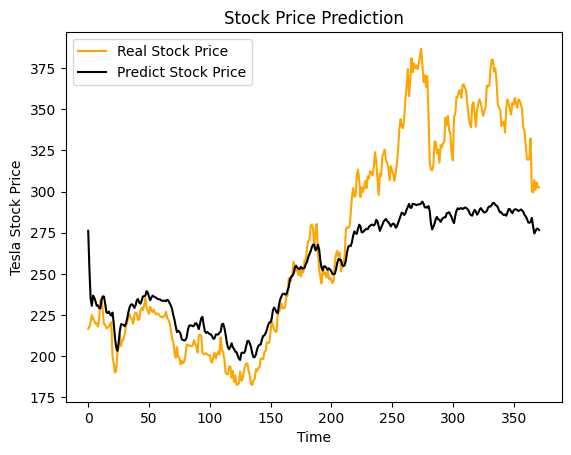

In [22]:
plt.plot(real_price, color = "orange", label = "Real Stock Price")
plt.plot(predict, color = "black", label = "Predict Stock Price")
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Tesla Stock Price")
plt.legend()
plt.show()

The predicted stock prices are plotted alongside the real stock prices to visualize the model's performance.

This process demonstrates a typical workflow for time series prediction using SimpleRNN, involving data preprocessing, model building, training, and evaluation.

# Building a LSTM model for comparision : 

# Why LSTM over RNN  ? 


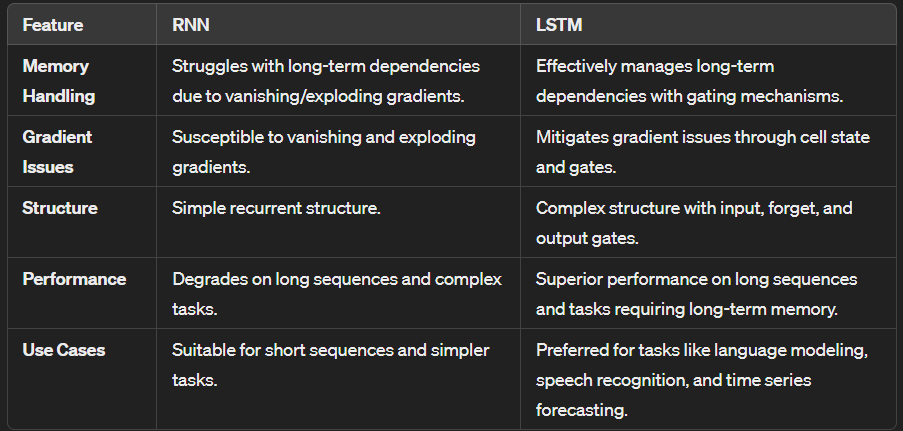

## Step 1: Import Necessary Libraries
We start by importing the necessary libraries. These include libraries for data manipulation, visualization, and building the LSTM model.

* **numpy**: For numerical operations.
* **pandas**: For data manipulation and analysis.
* **seaborn** and matplotlib: For data visualization.
* **MinMaxScaler** from sklearn.preprocessing: For feature scaling.
* **Sequential**, **Dense**, **LSTM**, and **Dropout** from **keras**: For building the LSTM model.

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

## Step 2: Load and Visualize Data :
Load your time series data into a DataFrame and visualize it to understand its structure and characteristics.

In [24]:
data = pd.read_csv("/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/tsla.us.txt")


Load the Tesla stock data. Print the first few rows, the shape of the data, summary statistics, and check for missing values.





In [25]:
print(data.head())
print(data.shape)
print(data.describe())
print(data.isna().sum())


         Date   Open   High    Low  Close    Volume  OpenInt
0  2010-06-28  17.00  17.00  17.00  17.00         0        0
1  2010-06-29  19.00  25.00  17.54  23.89  18783276        0
2  2010-06-30  25.79  30.42  23.30  23.83  17194394        0
3  2010-07-01  25.00  25.92  20.27  21.96   8229863        0
4  2010-07-02  23.00  23.10  18.71  19.20   5141807        0
(1858, 7)
              Open         High          Low        Close        Volume  \
count  1858.000000  1858.000000  1858.000000  1858.000000  1.858000e+03   
mean    150.389741   152.898737   147.688064   150.355047  4.416508e+06   
std     107.071675   108.490099   105.481665   107.023737  4.244294e+06   
min      16.140000    16.630000     8.030000    15.800000  0.000000e+00   
25%      31.002500    31.732500    30.285000    31.112500  1.283324e+06   
50%     184.440000   188.660000   181.450000   184.850000  3.421026e+06   
75%     231.477500   235.375000   227.772500   230.920000  5.917672e+06   
max     386.690000   389

## Step 3: Split Data into Training and Test Sets


In [26]:
training_size = int(len(data) * 0.80)
data_len = len(data)

train = data[0:training_size]
test = data[training_size:data_len]

# Split the data into training (80%) and test (20%) sets.
print("Training Size --> ", training_size)
print("Total length of data --> ", data_len)
print("Train length --> ", len(train))
print("Test length --> ", len(test))


Training Size -->  1486
Total length of data -->  1858
Train length -->  1486
Test length -->  372


## Step 4: Scale the Training Data


In [27]:
train = train.loc[:, ["Open"]].values

scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)

end_len = len(train_scaled)
X_train = []
y_train = []
timesteps = 40

for i in range(timesteps, end_len):
    X_train.append(train_scaled[i - timesteps:i, 0])
    y_train.append(train_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


# Scale the training data and create sequences of 40 timesteps for training the LSTM.
print("X_train shape --> ", X_train.shape)
print("y_train shape --> ", y_train.shape)


X_train shape -->  (1446, 40, 1)
y_train shape -->  (1446,)


## Step 5: Build and Train the LSTM Model :   

In [28]:
# Initialize a sequential model
regressor = Sequential()

# Add the first LSTM layer and add dropout regularization
regressor.add(LSTM(units=50, activation="tanh", return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Add the second LSTM layer and add dropout regularization
regressor.add(LSTM(units=50, activation="tanh", return_sequences=True))
regressor.add(Dropout(0.2))

# Add the third LSTM layer and add dropout regularization
regressor.add(LSTM(units=50, activation="tanh", return_sequences=True))
regressor.add(Dropout(0.2))

# Add the fourth LSTM layer and add dropout regularization
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# Add the output layer
regressor.add(Dense(units=1))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Build an LSTM model with four LSTM layers and dropout regularization. Compile and train the model.

In [29]:
regressor.compile(optimizer="adam", loss="mean_squared_error")


In [30]:
epochs = 100
batch_size = 20

regressor.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)


Epoch 1/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - loss: 0.0468
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0070
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0064
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 0.0060
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0044
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.0043
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.0046
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0044
Epoch 9/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0039
Epoch 10/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0038
Epoch 11/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0033
Epoch 12/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0036
Epoch 13/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0035
Epoch 14/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0032
Epoch 15/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - l

## Step 6: Prepare Test Data: 

In [31]:
real_price = test.loc[:, ["Open"]].values
print("Real Price Shape --> ", real_price.shape)

dataset_total = pd.concat((data["Open"], test["Open"]), axis=0)
inputs = dataset_total[len(dataset_total) - len(test) - timesteps:].values.reshape(-1, 1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(timesteps, len(inputs)):
    X_test.append(inputs[i - timesteps:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print("X_test shape --> ", X_test.shape)


Real Price Shape -->  (372, 1)
X_test shape -->  (372, 40, 1)


## Step 7: Make Predictions
Make predictions using the trained LSTM model and inverse transform the scaled predictions.

In [32]:
predict = regressor.predict(X_test)
predict = scaler.inverse_transform(predict)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step


## Step 8: Visualize the Results

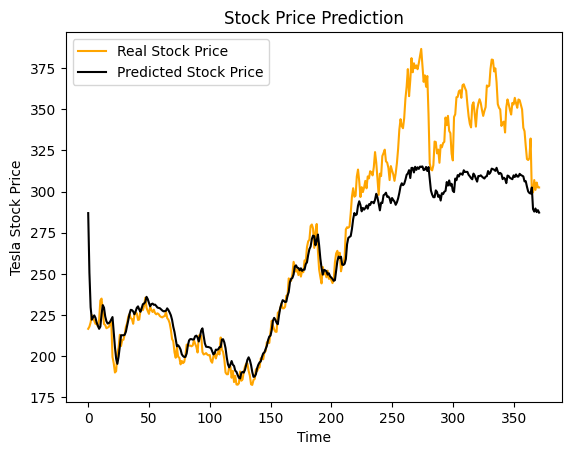

In [33]:
plt.plot(real_price, color="orange", label="Real Stock Price")
plt.plot(predict, color="black", label="Predicted Stock Price")
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Tesla Stock Price")
plt.legend()
plt.show()


# Comparing both RNN and LSTM model.

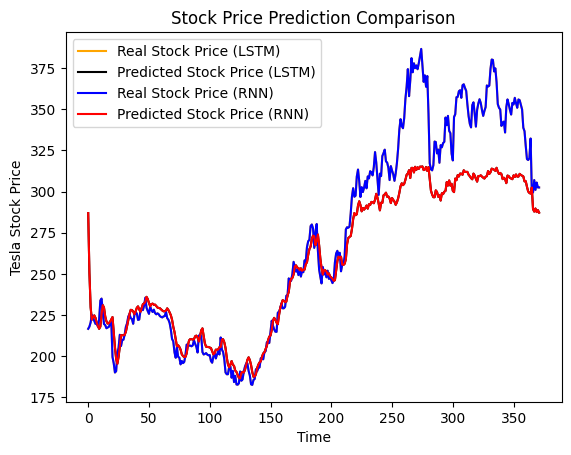

In [34]:
import matplotlib.pyplot as plt

# LSTM visualization
plt.plot(real_price, color="orange", label="Real Stock Price (LSTM)")
plt.plot(predict, color="black", label="Predicted Stock Price (LSTM)")

# RNN visualization
plt.plot(real_price, color="blue", label="Real Stock Price (RNN)")
plt.plot(predict, color="red", label="Predicted Stock Price (RNN)")

plt.title("Stock Price Prediction Comparison")
plt.xlabel("Time")
plt.ylabel("Tesla Stock Price")
plt.legend()
plt.show()


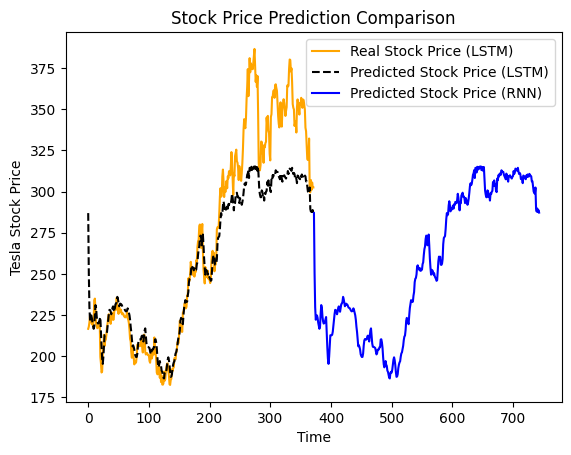

In [35]:
import matplotlib.pyplot as plt

# LSTM visualization
plt.plot(real_price, color="orange", label="Real Stock Price (LSTM)")
plt.plot(predict, color="black", linestyle='--', label="Predicted Stock Price (LSTM)")

# RNN visualization shifted to the right
plt.plot(range(len(real_price), len(real_price) + len(predict)), predict, color="blue", label="Predicted Stock Price (RNN)")

plt.title("Stock Price Prediction Comparison")
plt.xlabel("Time")
plt.ylabel("Tesla Stock Price")
plt.legend()
plt.show()


# Conclusion : 


* Performance Comparison: By comparing the predicted stock prices of both LSTM and RNN models with the real stock prices, we can assess the performance of each model. If the predicted prices closely match the real prices, it indicates that the model is capturing the underlying patterns in the data effectively.

* Model Accuracy: The model with predictions that closely align with the real stock prices can be considered more accurate. In this case, if one model's predictions consistently deviate more from the real prices compared to the other model, it suggests that the latter model might be performing better.

* Prediction Consistency: It's essential to evaluate not only the accuracy but also the consistency of predictions over time. If one model consistently provides predictions that follow the trend of the real prices more closely over multiple time points, it indicates greater reliability in its forecasts.

* Model Robustness: Assessing how well each model performs across different time periods and market conditions can provide insights into their robustness. A model that consistently performs well across various scenarios is more likely to be robust and reliable for future predictions.

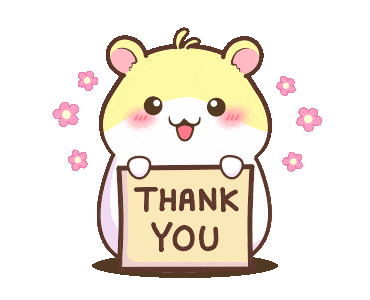
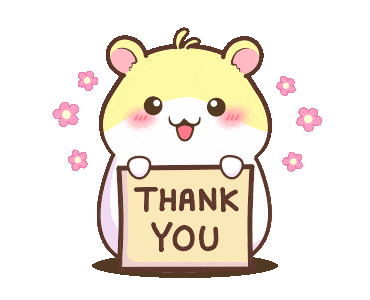
